In [ ]:
http://www.movable-type.co.uk/scripts/latlong.html

In [15]:
import pandas as pd
dfstat = pd.DataFrame({'STOP_ID': ['19970', '19971', '19972', '19973', '19974'],
 'STOP_NAME': ['Royal Park Railway Station (Parkville)',
  'Flemington Bridge Railway Station (North Melbo...',
  'Macaulay Railway Station (North Melbourne)',
  'North Melbourne Railway Station (West Melbourne)',
  'Clifton Hill Railway Station (Clifton Hill)'],
 'LATITUDE': ['25.053209551509337',
  '-37.788140',
  '-37.794267',
  '-37.807419',
  '-37.788657'],
 'LONGITUDE': ['121.52986538207958',
  '144.939323',
  '144.936166',
  '144.942570',
  '144.995417'],
 'TICKETZONE': ['1', '1', '1', '1', '1'],
 'ROUTEUSSP': ['Upfield',
  'Upfield',
  'Upfield',
  'Flemington,Sunbury,Upfield,Werribee,Williamsto...',
  'Mernda,Hurstbridge'],
 'geometry': ['POINT (144.95230 -37.78119)',
  'POINT (144.93932 -37.78814)',
  'POINT (144.93617 -37.79427)',
  'POINT (144.94257 -37.80742)',
  'POINT (144.99542 -37.78866)']})
dfsub = pd.DataFrame({'id': ['4901', '4902', '4903', '4904', '4905'],
 'postcode': ['3000', '3002', '3003', '3005', '3006'],
 'suburb': ['MELBOURNE',
  'EAST MELBOURNE',
  'WEST MELBOURNE',
  'WORLD TRADE CENTRE',
  'SOUTHBANK'],
 'state': ['VIC', 'VIC', 'VIC', 'VIC', 'VIC'],
 'lat': ['25.04313556812551', '25.05247835148322', '-37.806255', '-37.822262', '-37.823258'],
 'lon': ['121.53258526966515', '121.51718995432404', '144.941123', '144.954856', '144.965926']})

In [16]:
dfstat

,STOP_ID,STOP_NAME,LATITUDE,LONGITUDE,TICKETZONE,ROUTEUSSP,geometry
0,19970,Royal Park Railway Station (Parkville),25.053209551509337,121.52986538207958,1,Upfield,POINT (144.95230 -37.78119)
1,19971,Flemington Bridge Railway Station (North Melbo...,-37.788140,144.939323,1,Upfield,POINT (144.93932 -37.78814)
2,19972,Macaulay Railway Station (North Melbourne),-37.794267,144.936166,1,Upfield,POINT (144.93617 -37.79427)
3,19973,North Melbourne Railway Station (West Melbourne),-37.807419,144.942570,1,"Flemington,Sunbury,Upfield,Werribee,Williamsto...",POINT (144.94257 -37.80742)
4,19974,Clifton Hill Railway Station (Clifton Hill),-37.788657,144.995417,1,"Mernda,Hurstbridge",POINT (144.99542 -37.78866)


In [17]:
dfsub

,id,postcode,suburb,state,lat,lon
0,4901,3000,MELBOURNE,VIC,25.04313556812551,121.53258526966515
1,4902,3002,EAST MELBOURNE,VIC,25.05247835148322,121.51718995432404
2,4903,3003,WEST MELBOURNE,VIC,-37.806255,144.941123
3,4904,3005,WORLD TRADE CENTRE,VIC,-37.822262,144.954856
4,4905,3006,SOUTHBANK,VIC,-37.823258,144.965926


In [18]:
# ! pip install geopy
# https://files.pythonhosted.org/packages/e1/e1/45f25e3d3acf26782888f847de7c958a2807a039210fb1016cc3fb9555c4/geopy-2.2.0-py3-none-any.whl

In [20]:
import geopy.distance
# cartesian product so we get all combinations
dfdist = (dfsub.assign(foo=1).merge(dfstat.assign(foo=1), on="foo")
    # calc distance in km between each suburb and each train station
     .assign(km=lambda dfa: dfa.apply(lambda r: 
                                      geopy.distance.geodesic(
                                          (r["LATITUDE"],r["LONGITUDE"]), 
                                          (r["lat"],r["lon"])).km, axis=1))
    # reduce number of columns to make it more digestable
     .loc[:,["postcode","suburb","STOP_ID","STOP_NAME","km"]]
    # sort so shortest distance station from a suburb is first
     .sort_values(["postcode","suburb","km"])
    # good practice
     .reset_index(drop=True)
)

In [21]:
dfdist

,postcode,suburb,STOP_ID,STOP_NAME,km
0,3000,MELBOURNE,19970,Royal Park Railway Station (Parkville),1.149189
1,3000,MELBOURNE,19971,Flemington Bridge Railway Station (North Melbo...,7373.059166
2,3000,MELBOURNE,19972,Macaulay Railway Station (North Melbourne),7373.574669
3,3000,MELBOURNE,19974,Clifton Hill Railway Station (Clifton Hill),7375.060698
4,3000,MELBOURNE,19973,North Melbourne Railway Station (West Melbourne),7375.138581
5,3002,EAST MELBOURNE,19970,Royal Park Railway Station (Parkville),1.281600
6,3002,EAST MELBOURNE,19971,Flemington Bridge Railway Station (North Melbo...,7374.565352
7,3002,EAST MELBOURNE,19972,Macaulay Railway Station (North Melbourne),7375.080756
8,3002,EAST MELBOURNE,19974,Clifton Hill Railway Station (Clifton Hill),7376.567738
9,3002,EAST MELBOURNE,19973,North Melbourne Railway Station (West Melbourne),7376.644657


In [9]:
dfdist.dtypes

postcode      object
suburb        object
STOP_ID       object
STOP_NAME     object
km           float64
dtype: object

In [10]:
# finally pick out stations nearest to suburb
# this can easily be joined back to source data frames as postcode and STOP_ID have been maintained
dfnearest = dfdist.groupby(["postcode","suburb"])\
    .agg({"STOP_ID":"first","STOP_NAME":"first","km":"first"}).reset_index()
dfnearest

,postcode,suburb,STOP_ID,STOP_NAME,km
0,3000,MELBOURNE,19973,North Melbourne Railway Station (West Melbourne),2.564586
1,3002,EAST MELBOURNE,19974,Clifton Hill Railway Station (Clifton Hill),3.177320
2,3003,WEST MELBOURNE,19973,North Melbourne Railway Station (West Melbourne),0.181463
3,3005,WORLD TRADE CENTRE,19973,North Melbourne Railway Station (West Melbourne),1.970909
4,3006,SOUTHBANK,19973,North Melbourne Railway Station (West Melbourne),2.705553


In [ ]:
dfstat = pd.DataFrame({'STOP_ID': ['19970', '19971', '19972', '19973', '19974'],
 'STOP_NAME': ['Royal Park Railway Station (Parkville)',
  'Flemington Bridge Railway Station (North Melbo...',
  'Macaulay Railway Station (North Melbourne)',
  'North Melbourne Railway Station (West Melbourne)',
  'Clifton Hill Railway Station (Clifton Hill)'],
 'LATITUDE': ['-37.781193',
  '-37.788140',
  '-37.794267',
  '-37.807419',
  '-37.788657'],
 'LONGITUDE': ['144.952301',
  '144.939323',
  '144.936166',
  '144.942570',
  '144.995417'],
 'TICKETZONE': ['1', '1', '1', '1', '1'],
 'ROUTEUSSP': ['Upfield',
  'Upfield',
  'Upfield',
  'Flemington,Sunbury,Upfield,Werribee,Williamsto...',
  'Mernda,Hurstbridge'],
 'geometry': ['POINT (144.95230 -37.78119)',
  'POINT (144.93932 -37.78814)',
  'POINT (144.93617 -37.79427)',
  'POINT (144.94257 -37.80742)',
  'POINT (144.99542 -37.78866)']})
dfsub = pd.DataFrame({'id': ['4901', '4902', '4903', '4904', '4905'],
 'postcode': ['3000', '3002', '3003', '3005', '3006'],
 'suburb': ['MELBOURNE',
  'EAST MELBOURNE',
  'WEST MELBOURNE',
  'WORLD TRADE CENTRE',
  'SOUTHBANK'],
 'state': ['VIC', 'VIC', 'VIC', 'VIC', 'VIC'],
 'lat': ['-37.814563', '-37.816640', '-37.806255', '-37.822262', '-37.823258'],
 'lon': ['144.970267', '144.987811', '144.941123', '144.954856', '144.965926']})

import geopy.distance
# cartesian product so we get all combinations
dfdist = (dfsub.assign(foo=1).merge(dfstat.assign(foo=1), on="foo")
    # calc distance in km between each suburb and each train station
     .assign(km=lambda dfa: dfa.apply(lambda r: 
                                      geopy.distance.geodesic(
                                          (r["LATITUDE"],r["LONGITUDE"]), 
                                          (r["lat"],r["lon"])).km, axis=1))
    # reduce number of columns to make it more digestable
     .loc[:,["postcode","suburb","STOP_ID","STOP_NAME","km"]]
    # sort so shortest distance station from a suburb is first
     .sort_values(["postcode","suburb","km"])
    # good practice
     .reset_index(drop=True)
)
# finally pick out stations nearest to suburb
# this can easily be joined back to source data frames as postcode and STOP_ID have been maintained
dfnearest = dfdist.groupby(["postcode","suburb"])\
    .agg({"STOP_ID":"first","STOP_NAME":"first","km":"first"}).reset_index()

print(dfnearest.to_string(index=False))
dfnearest

In [11]:
print(dfnearest.to_string(index=False))
dfnearest

postcode              suburb STOP_ID                                         STOP_NAME        km
    3000           MELBOURNE   19973  North Melbourne Railway Station (West Melbourne)  2.564586
    3002      EAST MELBOURNE   19974       Clifton Hill Railway Station (Clifton Hill)  3.177320
    3003      WEST MELBOURNE   19973  North Melbourne Railway Station (West Melbourne)  0.181463
    3005  WORLD TRADE CENTRE   19973  North Melbourne Railway Station (West Melbourne)  1.970909
    3006           SOUTHBANK   19973  North Melbourne Railway Station (West Melbourne)  2.705553


,postcode,suburb,STOP_ID,STOP_NAME,km
0,3000,MELBOURNE,19973,North Melbourne Railway Station (West Melbourne),2.564586
1,3002,EAST MELBOURNE,19974,Clifton Hill Railway Station (Clifton Hill),3.177320
2,3003,WEST MELBOURNE,19973,North Melbourne Railway Station (West Melbourne),0.181463
3,3005,WORLD TRADE CENTRE,19973,North Melbourne Railway Station (West Melbourne),1.970909
4,3006,SOUTHBANK,19973,North Melbourne Railway Station (West Melbourne),2.705553


In [35]:
import pandas as pd
import numpy as np
import sklearn.neighbors
# Create two dataframes with city names and lat-long in degrees
locations_A = pd.DataFrame({
    'city_A' :     ['A', 'paris ', 'Albuquerque', 'Ann Arbor'],
    'latitude_A':  [ 25.053209551509337,     48.8566,    35.08,         42.28],
    'longitude_A': [ 121.52986538207958,    2.3522, -106.65,       -83.74]
})
locations_B = pd.DataFrame({
    'city_B':      ['B', 'lyon ', 'Berkley', 'Bellevue'],
    'latitude_B' : [ 25.05247835148322,   45.7640,        37.87,     47.61],
    'longitude_B': [ 121.51718995432404,  4.8357,      -122.27,   -122.20]
})

In [36]:
locations_A

,city_A,latitude_A,longitude_A
0,A,25.05321,121.529865
1,paris,48.85660,2.352200
2,Albuquerque,35.08000,-106.650000
3,Ann Arbor,42.28000,-83.740000


In [37]:
locations_B

,city_B,latitude_B,longitude_B
0,B,25.052478,121.51719
1,lyon,45.764000,4.83570
2,Berkley,37.870000,-122.27000
3,Bellevue,47.610000,-122.20000


In [38]:
# add columns with radians for latitude and longitude
locations_A[['lat_radians_A','long_radians_A']] = (
    np.radians(locations_A.loc[:,['latitude_A','longitude_A']])
)
locations_B[['lat_radians_B','long_radians_B']] = (
    np.radians(locations_B.loc[:,['latitude_B','longitude_B']])
)

In [39]:
locations_A[['lat_radians_A','long_radians_A']] = (
    np.radians(locations_A.loc[:,['latitude_A','longitude_A']])
)

In [40]:
locations_B[['lat_radians_B','long_radians_B']] = (
    np.radians(locations_B.loc[:,['latitude_B','longitude_B']])
)

In [51]:
dist = sklearn.neighbors.DistanceMetric.get_metric('haversine')
dist_matrix = (dist.pairwise
    (locations_A[['lat_radians_A','long_radians_A']],
     locations_B[['lat_radians_B','long_radians_B']])*6371
)

In [52]:
dist_matrix

array([[1.27942553e+00, 9.88333916e+03, 1.03631498e+04, 9.73708722e+03],
       [9.82648685e+03, 3.91498932e+02, 8.93735127e+03, 8.03546695e+03],
       [1.16245628e+04, 8.70732557e+03, 1.42882734e+03, 1.89719889e+03],
       [1.20915590e+04, 6.70959661e+03, 3.28639631e+03, 3.05168140e+03]])

In [53]:
df_dist_matrix = (
    pd.DataFrame(dist_matrix,index=locations_A['city_A'], 
                 columns=locations_B['city_B'])
)

In [54]:
df_dist_matrix

city_B,B,lyon,Berkley,Bellevue
city_A,,,,
A,1.279426,9883.339161,10363.149752,9737.087220
paris,9826.486845,391.498932,8937.351274,8035.466950
Albuquerque,11624.562799,8707.325566,1428.827344,1897.198887
Ann Arbor,12091.559039,6709.596608,3286.396309,3051.681403


In [49]:
df_dist_long = (
    pd.melt(df_dist_matrix.reset_index(),id_vars='city_A')
)
df_dist_long

,city_A,city_B,value
0,A,B,1.279426
1,paris,B,9826.486845
2,Albuquerque,B,11624.562799
3,Ann Arbor,B,12091.559039
4,A,lyon,9883.339161
5,paris,lyon,391.498932
6,Albuquerque,lyon,8707.325566
7,Ann Arbor,lyon,6709.596608
8,A,Berkley,10363.149752
9,paris,Berkley,8937.351274


In [28]:
df_dist_long = df_dist_long.rename(columns={'value':'miles'})
df_dist_long

,city_A,city_B,miles
0,Atlanta,Boston,936.076298
1,Aspen,Boston,1870.061460
2,Albuquerque,Boston,1967.911506
3,Ann Arbor,Boston,647.250084
4,Atlanta,Baltimore,576.797573
5,Aspen,Baltimore,1609.131867
6,Albuquerque,Baltimore,1671.139388
7,Ann Arbor,Baltimore,426.212109
8,Atlanta,Berkley,2126.980759
9,Aspen,Berkley,839.063817


In [30]:
from random import uniform
from itertools import product
A = [(uniform(-90, 90), uniform(-180, 180)) for x in range(100)]
B = [(uniform(-90, 90), uniform(-180, 180)) for x in range(100)]
a_min = b_min = min_dist = None
dist_km = lambda a, b: Geodesic.WGS84.Inverse(a[0], a[1], b[0], b[1])['s12'] / 1000.0

for a, b in product(A, B):
    d = dist_km(a, b)
    if min_dist is None or d < min_dist:
        min_dist = d
        a_min = a
        b_min = b

NameError: name 'Geodesic' is not defined

In [ ]:
from random import uniform
from itertools import product
A = [(uniform(-90, 90), uniform(-180, 180)) for x in range(100)]
B = [(uniform(-90, 90), uniform(-180, 180)) for x in range(100)]
a_min = b_min = min_dist = None
for a, b in product(A, B):
    d = dist_km(a, b)
    if min_dist is None or d < min_dist:
        min_dist = d
        a_min = a
        b_min = b

print('%.3f km between %s and %s' % (min_dist, a_min, b_min))

In [1]:
! pip install pygal

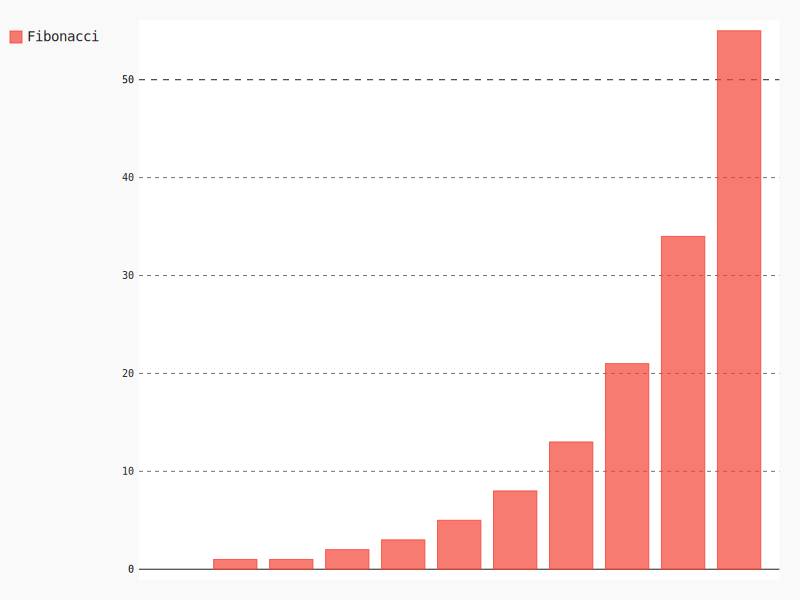

In [6]:
import pygal                                                      
from IPython.display import SVG
bar_chart = pygal.Bar()                                            
bar_chart.add('Fibonacci', [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55])  
bar_chart.render_to_file('bar_chart.svg')
SVG(filename='bar_chart.svg')

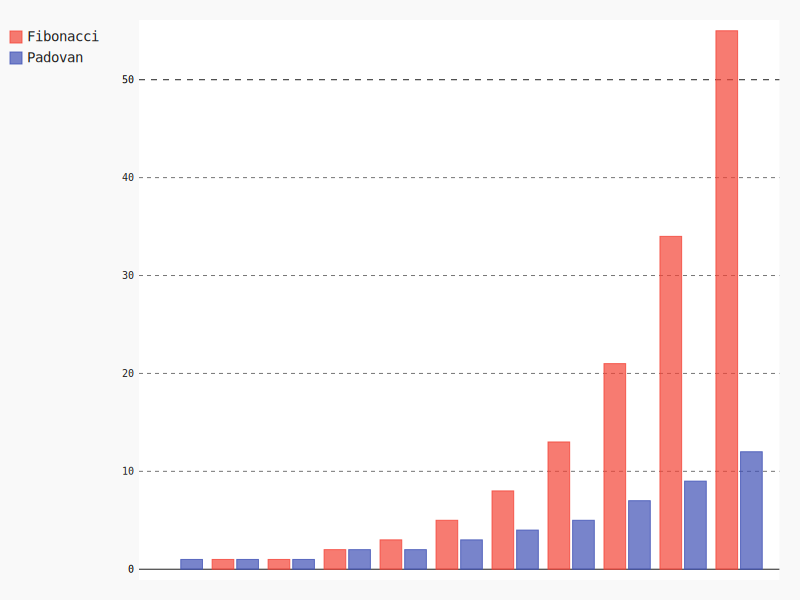

In [5]:
bar_chart = pygal.Bar()
bar_chart.add('Fibonacci', [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55])
bar_chart.add('Padovan', [1, 1, 1, 2, 2, 3, 4, 5, 7, 9, 12])
bar_chart.render_to_file('bar_chart2.svg') 
SVG(filename='bar_chart2.svg')

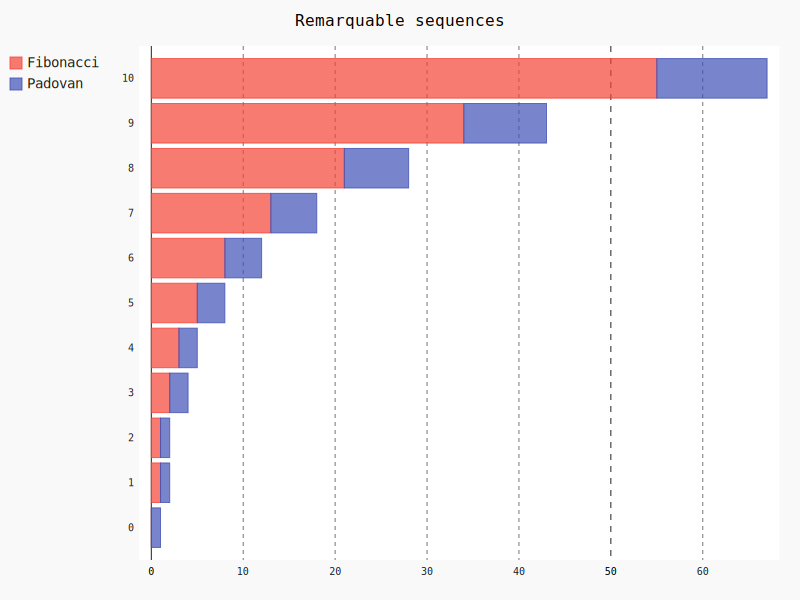

In [7]:
bar_chart = pygal.HorizontalStackedBar()
bar_chart.title = "Remarquable sequences"
bar_chart.x_labels = map(str, range(11))
bar_chart.add('Fibonacci', [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55])
bar_chart.add('Padovan', [1, 1, 1, 2, 2, 3, 4, 5, 7, 9, 12])
bar_chart.render_to_file('bar_chart3.svg') 
SVG(filename='bar_chart3.svg')

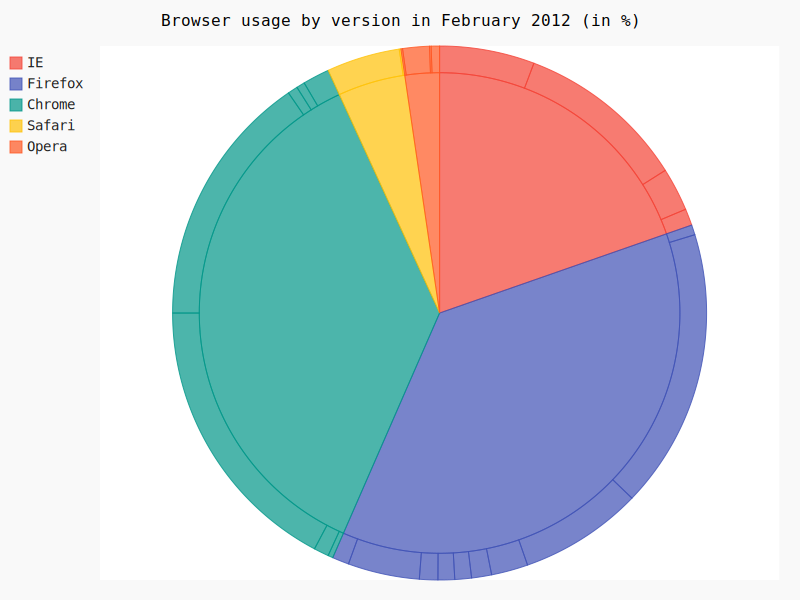

In [8]:
multipie_chart = pygal.Pie()
multipie_chart.title = 'Browser usage by version in February 2012 (in %)'
multipie_chart.add('IE', [5.7, 10.2, 2.6, 1])
multipie_chart.add('Firefox', [.6, 16.8, 7.4, 2.2, 1.2, 1, 1, 1.1, 4.3, 1])
multipie_chart.add('Chrome', [.3, .9, 17.1, 15.3, .6, .5, 1.6])
multipie_chart.add('Safari', [4.4, .1])
multipie_chart.add('Opera', [.1, 1.6, .1, .5])
multipie_chart.render_to_file('pie.svg') 
SVG(filename='pie.svg')

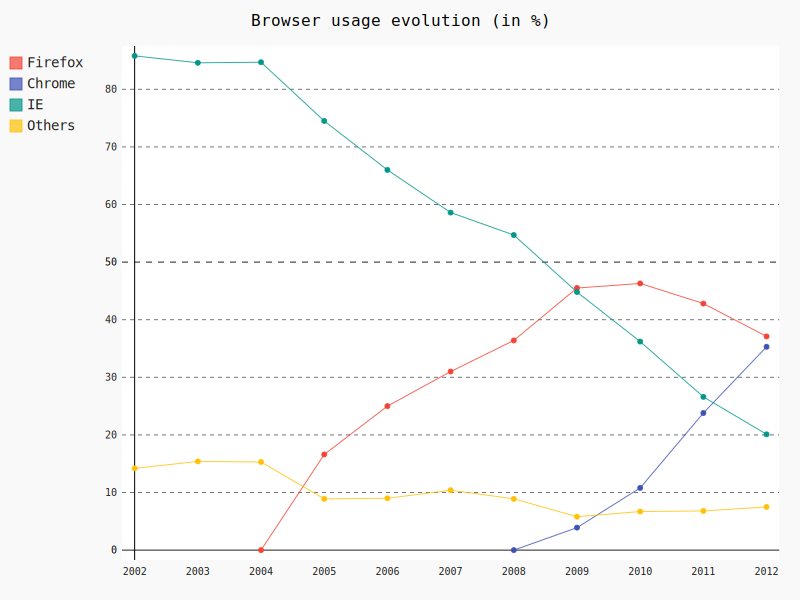

In [9]:
line_chart = pygal.Line()
line_chart.title = 'Browser usage evolution (in %)'
line_chart.x_labels = map(str, range(2002, 2013))
line_chart.add('Firefox', [None, None, 0, 16.6,   25,   31, 36.4, 45.5, 46.3, 42.8, 37.1])
line_chart.add('Chrome',  [None, None, None, None, None, None,    0,  3.9, 10.8, 23.8, 35.3])
line_chart.add('IE',      [85.8, 84.6, 84.7, 74.5,   66, 58.6, 54.7, 44.8, 36.2, 26.6, 20.1])
line_chart.add('Others',  [14.2, 15.4, 15.3,  8.9,    9, 10.4,  8.9,  5.8,  6.7,  6.8,  7.5])
line_chart.render_to_file('line.svg') 
SVG(filename='line.svg')

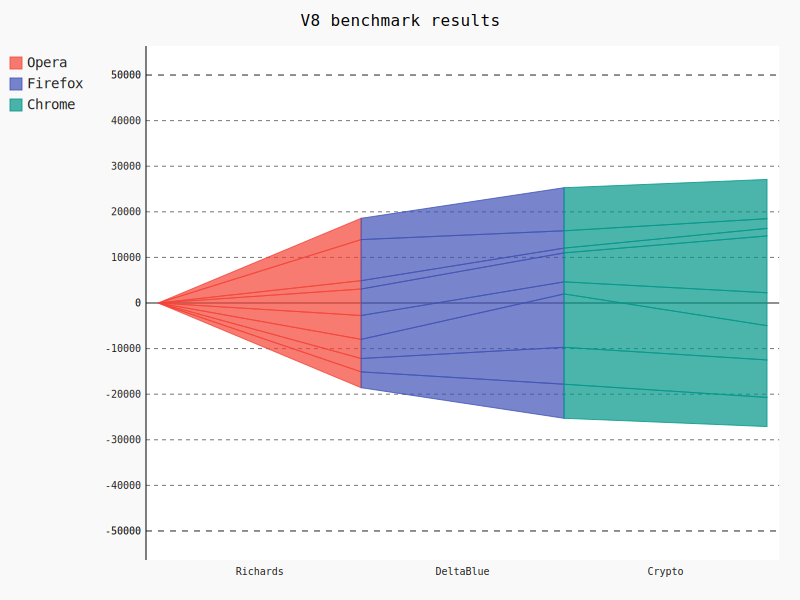

In [13]:
funnel_chart = pygal.Funnel()
funnel_chart.title = 'V8 benchmark results'
funnel_chart.x_labels = ['Richards', 'DeltaBlue', 'Crypto', 'RayTrace', 'EarleyBoyer', 'RegExp', 'Splay', 'NavierStokes']
funnel_chart.add('Opera', [3472, 2933, 4203, 5229, 5810, 1828, 9013, 4669])
funnel_chart.add('Firefox', [7473, 8099, 11700, 2651, 6361, 1044, 3797, 9450])
funnel_chart.add('Chrome', [6395, 8212, 7520, 7218, 12464, 1660, 2123, 8607])
funnel_chart.render_to_file('funnel.svg') 
SVG(filename='funnel.svg')

In [2]:
! pip install haversine

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [52]:
import haversine

In [22]:
??haversine.haversine

In [21]:


lat1 = 40.5; lat2 = 42; long1 = -90; long2 = -93
print(haversine.haversine((lat1, long1), (lat2, long2)) )

301.17042240782547


In [55]:
import pandas as pd
from scipy.spatial.distance import cdist
from haversine import haversine


df = pd.read_csv("C:\\Users\\reaganwei\\Downloads\\distance.csv")

# Name,Latitude,Longitude
# depot1,35.492807,139.6681689
# depot2,33.6625572,130.4096027
# depot3,35.6159881,139.7805445
# customer1,35.622632,139.732631
# customer2,35.857287,139.821461
# customer3,35.955313,139.615387
# customer4,35.16073,136.926239
# customer5,36.118163,139.509548
# customer6,35.937351,139.909783
# customer7,35.949508,139.676462

In [56]:
df

,Name,Latitude,Longitude
0,depot1,35.492807,139.668169
1,depot2,33.662557,130.409603
2,depot3,35.615988,139.780545
3,customer1,35.622632,139.732631
4,customer2,35.857287,139.821461
5,customer3,35.955313,139.615387
6,customer4,35.160730,136.926239
7,customer5,36.118163,139.509548
8,customer6,35.937351,139.909783
9,customer7,35.949508,139.676462


In [8]:
df.set_index('Name', inplace=True)

In [9]:
df

,Latitude,Longitude
Name,,
depot1,35.492807,139.668169
depot2,33.662557,130.409603
depot3,35.615988,139.780545
customer1,35.622632,139.732631
customer2,35.857287,139.821461
customer3,35.955313,139.615387
customer4,35.160730,136.926239
customer5,36.118163,139.509548
customer6,35.937351,139.909783


In [47]:
customers = df[df.index.str.startswith('customer')]
customers

,Latitude,Longitude
Name,,
customer1,35.622632,139.732631
customer2,35.857287,139.821461
customer3,35.955313,139.615387
customer4,35.160730,136.926239
customer5,36.118163,139.509548
customer6,35.937351,139.909783
customer7,35.949508,139.676462


In [48]:
depots = df[df.index.str.startswith('depot')]
depots

,Latitude,Longitude
Name,,
depot1,35.492807,139.668169
depot2,33.662557,130.409603
depot3,35.615988,139.780545


In [49]:
# depots2=depots.iloc[0:1]
# depots2

In [53]:
dm = cdist(customers, depots, metric=haversine)
dm

TypeError: 2nd argument metric must be a string identifier or a function.

In [43]:
type(dm)

numpy.ndarray

In [14]:
closest = dm.argmin(axis=1)
closest

array([2, 2, 2, 0, 2, 2, 2], dtype=int64)

In [16]:
distances = dm.min(axis=1)
distances

array([  4.39350581,  27.08421246,  40.56582002, 251.46615201,
        60.94537715,  37.58786229,  38.25577639])

In [66]:
depot=df[0:3]
depot

,Name,Latitude,Longitude
0,depot1,35.492807,139.668169
1,depot2,33.662557,130.409603
2,depot3,35.615988,139.780545


In [65]:
customer=df[3:11]
customer

,Name,Latitude,Longitude
3,customer1,35.622632,139.732631
4,customer2,35.857287,139.821461
5,customer3,35.955313,139.615387
6,customer4,35.160730,136.926239
7,customer5,36.118163,139.509548
8,customer6,35.937351,139.909783
9,customer7,35.949508,139.676462


In [67]:
import pandas as pd
import numpy as np
import sklearn.neighbors


In [71]:
depot[['lat_radians_X','long_radians_X']] = (
    np.radians(depot.loc[:,['Latitude','Longitude']])
)

C:\Users\reaganwei\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [72]:
customer[['lat_radians_X','long_radians_X']] = (
    np.radians(customer.loc[:,['Latitude','Longitude']])
)

C:\Users\reaganwei\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [74]:
dist = sklearn.neighbors.DistanceMetric.get_metric('haversine')
dist_matrix = (dist.pairwise
    (depot[['Latitude','Longitude']],
     customer[['Latitude','Longitude']])*3959
)

In [76]:
x=df_dist_matrix = (
    pd.DataFrame(dist_matrix,index=depot['Name'], 
                 columns=customer['Name'])
)

In [77]:
x

Name,customer1,customer2,customer3,customer4,customer5,customer6,customer7
Name,,,,,,,
depot1,531.928414,1463.533108,1832.323465,6194.112126,2476.296009,1789.840740,1808.111851
depot2,11728.232758,10834.798576,10425.827376,5986.709180,9800.002714,10515.102047,10458.371938
depot3,96.098678,957.120449,1356.978951,5793.149360,1989.603823,1281.966004,1326.099409


In [79]:
df_dist_unpv = (
    pd.melt(df_dist_matrix.reset_index(),id_vars='Name')
)
df_dist_unpv

,Name,Name,value
0,customer1,customer1,531.928414
1,customer1,customer1,11728.232758
2,customer1,customer1,96.098678
3,customer2,customer2,1463.533108
4,customer2,customer2,10834.798576
5,customer2,customer2,957.120449
6,customer3,customer3,1832.323465
7,customer3,customer3,10425.827376
8,customer3,customer3,1356.978951
9,customer4,customer4,6194.112126


In [1]:
# https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
from haversine import haversine_vector, Unit

lyon = (45.7597, 4.8422) # (lat, lon)
paris = (48.8567, 2.3508)
new_york = (40.7033962, -74.2351462)

haversine_vector([lyon, lyon], [paris, new_york], Unit.KILOMETERS)

array([ 392.21725956, 6163.43638211])